# Lesson 6.1 Scikit-Learn快速入门

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;“工欲善其事，必先利其器”        
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;——《论语·卫灵公》

In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

&emsp;&emsp;在此前的算法学习过程中，我们都是先从机器学习的算法理论出发，然后通过手动编程的方式来进行算法的建模实践。这其实是一种重内力大于重招式的学习方法，在理论+手动实现的学习过程中，我们不仅通过原理的手动实现深化了对基础原理的理解，同时也一定程度锻炼了代码实现能力，而这些其实都是一名算法工程师的基本功。        
&emsp;&emsp;不过，伴随着算法难度逐渐加深，“原理+手动实现”的学习方式将逐渐变得不太适用，至少对初学者来说，面对复杂算法学习时，“原理+手动实现”的学习方式并不高效。对于定位在利用算法解决问题的算法工程岗位来说，整体的技能要求其实是内功和招式并重的。也就是说，我们不仅需要通晓算法原理以及具备一定的编程能力，同时也需要掌握一些能够比手动编写算法更高效的执行机器学习建模的工具，也就是掌握一些算法包或者算法库工具。        
&emsp;&emsp;所谓算法库或者算法包，其实就是指封装了一系列可以执行机器学习算法建模相关功能的函数和类的程序模块，其功能调用方法和此前我们自定义的ML_basic_function.py文件类似。当然，对于不同的编程语言和运行环境，其实有对应不同的算法库或算法包，例如在R语言中，就有数以万计的针对不同算法的一个个独立的算法包，比较有名的诸如提供分类模型建模功能支持的rpart包、提供聚类算法建模功能的cluster包等等。尽管这些分门别类的包在每一项（类）具体算法建模过程中都能提供非常专业的功能支持，但由于这些算法包是由不同的团队/个人来进行的开发和维护，包的使用方法和维护相同都各不相同，这就使得一个使用R语言的算法工作者在日常工作中至少需要和几十个算法包打交道，并且由于各个包相对独立，使得算法工作者需要时刻关注各包的更新情况及兼容方法（如果需要的话），这些都在无形之中对使用R语言进行机器学习建模造成了一定的阻碍。        
&emsp;&emsp;虽然Python也是开源语言，但或许是吸取了R语言的前车之鉴（Python比R诞生更晚），也或许是拥有了更完整的科学计算库SciPy，Python数据科学的一些核心功能都由一些更加统一和规范的第三方库来提供，例如科学计算库NumPy、表格数据分析包Pandas，以及机器学习算法库Scikit-Learn。

> 算法包、算法库、算法框架概念辨析：      
&emsp;&emsp;很多时候我们在使用这三个概念的时候并不会特别在意三者的区别，或者说大多数时候这三者概念的区别并不会影响我们实际对不同的程序模块的称呼，例如我们会称呼sklearn为一个算法库，要使用xgboost时候需要安装一个对应的算法包，而类似PyTorch、TensorFlow这种能够执行深度学习运算的模块，我们则会称其为算法框架。        
&emsp;&emsp;但其实三者其实还是略有区别，对于算法包来说，可能只是包含了支持单独一个或一类算法使用的类或函数；而算法库则指代封装程度更高、对机器学习这一大类算法功能实现更加完整、甚至是定义了一类数据结构的代码模块；当然，如果是算法框架，则会在算法库的基础上，更进一步定义基本对象类型的运行方式。

## 一、Scikit-Learn的前世今生

- Scikit-Learn项目简介

&emsp;&emsp;Scikit-Learn最早是由David Cournapeau等人在2007年谷歌编程之夏（Google Summer of Code）活动中发起的一个项目，并与2010年正式开源，目前归属INRIA（法国国家信息与自动化研究所）。而项目取名为Scikit-Learn，也是因为该算法库是基于SciPy来进行的构建，而Scikit则是SciPy Kit（SciPy衍生的工具套件）的简称，而learn则不禁让人联系到机器学习Machine Learning。因此，尽管Scikit-Learn看起来不如NumPy、Pandas短小精悍，但其背后的实际含义也是一目了然。

&emsp;&emsp;经过数十年的发展，Scikit-Learn已经成为目前机器学习领域最完整、同时也是最具影响力的算法库，更重要的是，该项目拥有较为充裕的资金支持和完整规范的运作流程，以及业内顶级的开发和维护团队，目前以三个月一个小版本的速度在进行更新迭代。

- Scikit-Learn官网与中文社区

&emsp;&emsp;作为非营利性组织维护的开源项目，我们可以从https://scikit-learn.org/stable/ 网址登陆Scikit-Learn项目官网。

&emsp;&emsp;值得一提的是，对于大多数流行的开源项目，官网都是学习的绝佳资源。而对于Scikit-Learn来说尤其是如此。要知道，哪怕是顶级开源项目盛行的当下，Scikit-Learn官网在相关内容介绍的详细和完整程度上，都是业内首屈一指的。无论是Scikit-Learn的安装、更新，还是具体算法的使用方法，甚至包括算法核心原理的论文出处以及算法使用的案例，在Scikit-Learn官网上都有详细的介绍。稍后我们将对其逐一进行详细介绍。

&emsp;&emsp;正是因为Scikit-Learn官网内容的完整性，国内也有许多团队试图将Scikit-Learn项目进行翻译、并建立相应的中文社区。但遗憾的是，由于国内的大多数团队对于开源项目的维护、管理和资金运作都缺乏必要的经验，导致诸多所谓的Scikit-Learn中文社区其实并不是真正意义上的开源社区，而是一堆过时的、不完整的、不准确的内容翻译拼凑而成的内容网站，借着技术传播之名、行商业产品引流之实。而这也最终导致国内的Scikit-Learn中文社区，充其量只能作为外文技术内容翻译的一个参考，而无法作为技术解释和技术学习的核心内容。因此，围绕Scikit-Learn的内容查阅，我们更推荐直接访问外文官网。

## 二、Scikit-Learn官网使用指南与核心功能介绍

&emsp;&emsp;接下来，我们围绕Scikit-Learn官网的基本架构与核心功能进行介绍，并同时介绍关于Scikit-Learn的基本安装与使用方法。进入Scikit-Learn官网，首先看到的是功能导航栏、sklearn基本情况介绍以及几个核心功能跳转链接。

<img src="https://tva1.sinaimg.cn/large/008i3skNly1gs1h57w27jj327c0dou0b.jpg" alt="1" style="zoom:40%;" />

&emsp;&emsp;关于核心信息部分，我们能够看到Scikit-Learn作为开源项目的基本申明，以及该开源项目所遵循的BSD协议。当然比较重要的一点是，sklearn是构建在NumPy、SciPy和matplotlib上的相关申明，后面我们会看到，sklearn中核心能够处理的对象类型就是NumPy当中的数组（array），同时sklearn中的诸多数学计算过程也都是基于SciPy中的相关功能来进行的实现。

> 值得注意的是，底层数据结构对算法库的影响是至关重要的，在分布式计算框架Spark中，算法库就有两类，其一是围绕Spark基本数据结构RDD构建的ML包，其二则是围绕Spark高级数据结构DataSet和DataFrame构建的MLLib包。当然由于基于更高级的数据结构所构建的算法模型更易于使用，因此ML包已经不再更新了。

### 1.Scikit-Learn的安装与更新

&emsp;&emsp;接下来核心介绍功能导航栏的相关功能。首先是关于Scikit-Learn的安装方法，我们可以在Install内进行查看：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs1htx2k1gj31hw0tyjvy.jpg" alt="1" style="zoom:33%;" />

该页面主要介绍了关于sklearn在不同平台下、使用不同工具的安装方法。如果是首次安装sklearn，可参考上述代码在命令行中进行安装。并且官网还贴心的指出，可以通过后面的代码查看sklearn的安装情况，其中第一行是查看目前安装的sklearn版本以及安装位置，第二行代码是查看安装好的第三方库（在当前虚拟环境下），第三行代码则是查看当前已经安装好的sklearn版本。

> 当然，该页面还细心的给出了虚拟环境不同版本第三方包冲突后的解决方案，以及sklearn的包的依赖包的安装方法，包括新版sklearn所需基础依赖包的版本号等。另外，该页面还给出了新版sklearn的Mac M1版本的包的安装方法，由此可见sklearn官网内容的详细程度。

&emsp;&emsp;当然，对于通过Anaconda安装Python的小伙伴来说，sklearn包已经在安装Anaconda的过程中安装好了，并且不同平台的Anaconda就已经自带了能够在对应平台运行的sklearn包，我们可以直接通过下述语句进行sklearn版本的查看：

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

&emsp;&emsp;本次课程将以sklearn 0.23+版本作为主要使用版本，相关方法兼容sklearn 0.22、0.24等版本，即0.22版本以上即可参与课程学习。如果版本低于0.22的，可通过如下方式进行版本更新：

pip install --upgrade sklearn

> 更多关于pip工具的讲解和使用，以及更加详细的Python第三方库管理方法，参见Python编程基础公开课的内容：https://www.bilibili.com/video/BV1U54y1W7jw?p=2

> sklearn从0.21版本开始不再支持Python 2，课程建议在Python 3环境中安装新版sklearn。

> 对于Mac M1的用户，考虑到Mac的多版本Python管理问题以及新版sklearn适配问题，建议使用Anaconda进行sklearn的安装，目前实测Mac版Anaconda已支持0.23.2版本，若后续Mac版Anaconda支持sklearn 0.24，则可随Anaconda一起更新。

### 2.Scikit-Learn核心概念与快速使用方法

&emsp;&emsp;作为功能完整算法库，sklearn不仅提供了完整的机器学习建模功能支持，同时也提供了包括数据预处理、模型评估、模型选择等诸多功能，并且支持以Pipelines（管道）形式构建机器学习流，而基于Pipeline和模型选择功能甚至能够衍化出AutoML（自动机器学习）的相关功能，也就是现在所谓的Auto-sklearn。

&emsp;&emsp;不过在开始阶段，我们还是需要从sklearn的基础功能入手进行学习，然后循序渐进、逐步深化对工具的理解和掌握。

- sklearn核心对象类型：评估器（estimator）

&emsp;&emsp;很多功能完整的第三方库其实都有各自定义的核心对象类型，如NumPy中的数组（Array）、Pandas中的DataFrame、以及PyTorch中的张量（tensor）等，当然这些由第三方库定义的数据结构实际上都是定义在源码中的某个类，在调用这些对象类型时实际上都是在实例化对应的类。而对于sklearn来说，定义的核心对象类型就是评估器。我们可以将评估器就理解成一个个机器学习模型，而sklearn的建模过程最核心的步骤就是围绕着评估器进行模型的训练。        
&emsp;&emsp;同样，围绕评估器的使用也基本分为两步，其一是实例化该对象，其二则是围绕某数据进行模型训练。接下来，我们就尝试调用sklearn中的线性回归评估器（模型）来进行线性回归建模实验。

&emsp;&emsp;首先是准备数据，我们还是以此前定义的、基本规律满足$y=2x_1-x_2+1$分布回归类数据集：

In [3]:
# 设置随机数种子
np.random.seed(24)   

# 扰动项取值为0.01
features, labels = arrayGenReg(delta=0.01)

In [4]:
# 查看数据
features

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

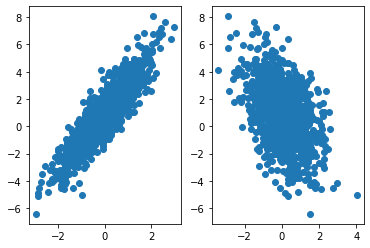

In [5]:
# 可视化数据分布
plt.subplot(121)
plt.plot(features[:, 0], labels, 'o')
plt.subplot(122)
plt.plot(features[:, 1], labels, 'o')

&emsp;&emsp;然后，尝试调用sklearn中的线性回归评估器，这里需要知道的是，sklearn其实是分模块存储不同评估器的类或者常用函数的，比如sklearn中的线性回归评估器`LinearRegression`实际上是在sklearn包中的`linear_model`模块下，因此调用该评估器其实会有以下三种方法：

In [6]:
# 方法一：直接导入sklearn
import sklearn

In [7]:
# 然后在sklearn里面的linear_model模块内查询LinearRegression评估器
sklearn.linear_model.LinearRegression

AttributeError: ignored

In [8]:
# 方法二：直接导入sklearn内的linear_model模块
from sklearn import linear_model

In [ ]:
# 然后在linear_model模块内查询LinearRegression评估器
linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [9]:
# 方法三：直接导入LinearRegression评估器
from sklearn.linear_model import LinearRegression

In [10]:
# 然后即可直接查询LinearRegression评估器
LinearRegression

sklearn.linear_model._base.LinearRegression

默认情况下，我们采用第三种方法导入评估器。

&emsp;&emsp;需要知道的是，导入评估器实际上就相当于是导入了某个模块（实际上是某个类），但要使用这个评估器类，还需要对其进行实例化操作才能进行后续的使用，类的实例化过程会有可选参数的输入，当然也可以不输入任何参数直接实例化该类的对象：

In [11]:
model = LinearRegression()

注意，此时model就是LinearRegression类的一个实例化对象，而这个model对象，其实就是一个线性回归模型。当然，刚被实例化后的模型实际上还是一个未被训练的模型，即此时的model其实是一个包含了若干个（暂时不确定）参数、并且参数取值待定的模型。接下来，我们需要输入上述数据对该模型进行训练。需要注意的是，此时我们无需在输入的特征矩阵中加入一列全都是1的列：

In [12]:
X = features[:, :2]           # 特征矩阵
y = labels                    # 标签数组

In [16]:
X

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039],
       [-1.07081626, -1.43871328],
       ...,
       [ 1.5507578 , -0.35986144],
       [-1.36267161, -0.61353562],
       [-1.44029131,  0.50439425]])

In [13]:
# 调用评估器中的fit方法进行模型训练
model.fit(X, y)

LinearRegression()

&emsp;&emsp;fit方法是LinearRegression类中的一个至关重要的方法，同时也是sklearn中代表模型的评估器都具有的方法，当fit方法执行完后，即完成了模型训练，此时model就相当于一个参数个数、参数取值确定的线性方程。而这些包括参数取值在内的所有模型信息，我们都可以通过调用model对象当中的一些属性来查看，例如：

In [14]:
# 查看自变量参数
model.coef_

array([[ 1.99961892, -0.99985281]])

In [15]:
# 查看模型截距
model.intercept_

array([0.99970541])

至此，我们就完成了模型训练过程。这里需要特别强调的是，sklearn默认接收的对象类型是数组，即无论是特征矩阵还是标签数组，最好都先转化成array对象类型再进行输入。此外，sklearn还能够处理array-like的数据，例如和数组形式相同的列表，但并不建议这么做。同时，在sklearn中，我们往往以称特征矩阵为Features Matrix，称特征数组为Target Vector，并且以$n_{samples}$表示数据行数、$n_{features}$表示特征矩阵列数：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2reipie9j30uc0p4q92.jpg" alt="1" style="zoom:33%;" />

当然我们也可以对比最小二乘法的手动计算结果：

In [17]:
np.linalg.lstsq(features, labels, rcond=-1)[0]

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

&emsp;&emsp;接下来，我们还可以利用该模型进行数值预测，我们就将模型应用于训练数据进行预测，可以使用model中的predict方法进行预测，同样，该方法也是sklearn中所有评估器类的一个方法：

In [18]:
model.predict(X)[:10]

array([[ 4.42754333],
       [ 1.35792976],
       [ 0.29698247],
       [ 1.83264567],
       [-2.47201615],
       [ 0.46806169],
       [ 2.8184199 ],
       [-0.81254525],
       [ 2.84841913],
       [ 0.81582296]])

In [19]:
y[:10]

array([[ 4.43811826],
       [ 1.375912  ],
       [ 0.30286597],
       [ 1.81970897],
       [-2.47783626],
       [ 0.47374318],
       [ 2.83085905],
       [-0.83695165],
       [ 2.84344069],
       [ 0.8176895 ]])

&emsp;&emsp;通过对比，我们不难发现发现，模型整体预测效果较好。当然，在借助sklean进行建模的时候，我们也可以借助sklearn提供的模型评估函数来进行模型最终效果的评估，而这些实用函数，就是sklearn算法库中第二类重要的对象类型。

- sklearn中的实用函数

&emsp;&emsp;接下来，我们尝试调用sklearn中的MSE计算函数，对上述建模结果进行模型评估。值得注意的是，这些调用的对象不再是评估器（类），而是一个个单独的函数。函数的调用过程不需要进行实例化，直接导入相关模块即可：

In [20]:
# 在metrics模块下导入MSE计算函数
from sklearn.metrics import mean_squared_error

In [21]:
# 输入数据，进行计算
mean_squared_error(model.predict(X), y)

9.300731379745612e-05

In [22]:
l = model.coef_.flatten().tolist()
l.extend(model.intercept_.tolist())
l

[1.9996189241115245, -0.9998528065894627, 0.9997054101551712]

In [23]:
w = np.array(l).reshape(-1, 1)
w

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

In [24]:
# 对比手动计算的MSE计算结果
MSELoss(features, w, y)

array([[9.30073138e-05]])

&emsp;&emsp;至此，我们即完成了调用sklearn进行建模的简单流程，当然，在更进一步加入数据预处理、数据集切分以及模型结果验证等步骤之前，我们需要讨论几个至关重要的影响模型建模过程的核心问题：

- 模型实例化与超参数设置

&emsp;&emsp;上述调用sklearn进行的机器学习建模，不仅代码简单、而且过程也非常清晰，这些其实全都得益于Scikit-Learn对各评估器都设置了较为普适的初始默认参数所导致。我们知道，每个模型的构建过程其实都会涉及非常多的参数和超参数，参数的训练过程稍后讨论，此处先讨论关于sklearn中模型超参数的设置方法。

&emsp;&emsp;所谓超参数，指的是无法通过数学过程进行最优值求解、但却能够很大程度上影响模型形式和建模结果的因素，例如线性回归中，方程中自变量系数和截距项的取值是通过最小二乘法或者梯度下降算法求出的最优解，而例如是否带入带入截距项、是否对数据进行归一化等，这些因素同样会影响模型形态和建模结果，但却是“人工判断”然后做出决定的选项，而这些就是所谓的超参数。         
&emsp;&emsp;而sklearn中，对每个评估器进行超参数设置的时机就在评估器类实例化的过程中。首先我们可以查看LinearRegression评估器的相关说明，其中Parameters部分就是当前模型超参数的相关说明：

In [25]:
LinearRegression?

我们可以简单解释上述评估器内的超参数选项：

|Name|Description|      
|:--:|:--:|      
|fit_intercept|是否构建带有截距项的线性方程，默认为True|      
|normalize|是否进行归一化处理(6.2节进行详细介绍)|	      
|copy_X|建模时是否带入训练数据的副本|
|n_jobs|设置工作时参与计算的CPU核数|

不难发现，这些都是影响建模过程、并且需要人工决策的选项，而这些超参数可以在实例化过程中进行设置，例如我们创建一个不包含截距项的线性方程模型：

In [27]:
model1 = LinearRegression(fit_intercept=False)

In [28]:
model1

LinearRegression(fit_intercept=False)

In [29]:
model1.get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

&emsp;&emsp;通过输入模型对象，我们就可以查看该评估器超参数取值情况（默认参数取值不显示），或者可以直接使用get_params方法查看模型参数。而对于一个已经实例化好的评估器，我们都可以通过set_params来对其进行参数修改，如果是已经训练好的模型，该方法不会抹去之前训练结果，但会影响下次训练流程。

In [30]:
model1.set_params(fit_intercept=True)

LinearRegression()

In [31]:
model.set_params(fit_intercept=False)

LinearRegression(fit_intercept=False)

In [32]:
model.coef_

array([[ 1.99961892, -0.99985281]])

In [33]:
model.intercept_

array([0.99970541])

In [34]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [35]:
model.coef_,model.intercept_

(array([[ 1.93291366, -0.96799981]]), 0.0)

&emsp;&emsp;我们可以简单评估器调用过程过程中各操作的代码意义和建模意义对比如下：

|操作步骤|代码意义|建模意义|      
|:--:|:--:|:--:|      
|评估器实例化|类在进行实例化时设置初始属性|对模型进行超参数设置|   

&emsp;&emsp;值得注意，超参数的设置方法和参数不同，一个模型的参数形式基本根据模型的计算规则就能确定，而一个模型包含几个超参数，其实是因模型而异、因工具而异的，例如，对于sklearn来说，我们可以通过n_jobs来设置参与计算的CPU核数，而在Spark中则是通过配置文件中的配置选项来分配每个任务的计算资源，不需要在算法执行过程中设置该超参数。但无论如何，sklearn中的超参数设计一定是一整套最符合sklearn设计理念以及模型运行方式的超参数，我们在实例化模型的过程中必须谨慎的选择模型超参数，以达到最终模型训练的预期。不过sklearn非常人性化的一点是，尽管大多数模型多有非常多的超参数（线性回归除外），但sklearn都对其设置了一套非常普适的默认值，从而使得在很多场景下，在无需特别关注的一些超参数的取值上，我们都能够直接使用默认值带入进行建模。

> 其实，我们还可以给出超参数的一个更加“广义”的定义：只要是影响模型建模过程的因素都是超参数，例如选取哪种优化方法、甚至是选取哪种算法进行建模，如果需要，我们都可以将其视作超参数，而不仅限于评估器中给出的这些。当然，如果要围绕这些超参数进行探讨，则需要更多的理论判别依据与实现工具。不过就模型选择来说，其实已经有一些框架能够实现模型的自动选择（不仅是模型自动调参，而是自动对比模型性能进而进行模型选择）。

> 不过尽管在定义上，参数与超参数是严格不同的，但很多场景下我们也不会对其进行严格区分，比如在实例化评估器的过程中，我们也更多的称其为“进行参数设置”。

> 需要注意的是，此处线性方程中的normalize并不是此前介绍的归一化方法，而是一种用每一行数据除以每一行数据的l1范数或者l2范数的方法，这种方法会在稍后进行介绍。

&emsp;&emsp;此外，我们还能够在类的说明中查阅关于模型对象在训练完后的相关属性，注意，这些属性只有当模型训练完毕后才能调用查看，对于线性方程来说，模型训练后可查看如下属性：

|Name|Description|      
|:--:|:--:|      
|coef_|线性方程自变量系数|      
|rank_|特征矩阵的秩|	      
|singular_|特征矩阵的奇异值|
|intercept_|线性方程截距项的系数|

In [36]:
# 训练后模型属性
model.rank_

2

In [37]:
# 训练前模型无该属性
model1.rank_

AttributeError: ignored

> sklean中线性回归评估器返回结果（属性）实际上就是np.linalg.lstsq完整返回的四个结果。

> 此外，关于评估器的说明文档，还包含了一些相关模型和类的使用实例，同学们可以根据实际需求自行查阅。

- 训练过程使用的参数求解方法

&emsp;&emsp;根据此前的讨论，我们知道，实现线性回归参数计算的方法有很多种，我们可以通过最小二乘法进行一步到位的参数求解，同时也能够通过梯度下降进行迭代求解，而sklearn是采用哪种方式进行求解的呢？需要知道的是，这个问题其实至关重要，它不仅影响了sklearn中该算法的执行计算效率，同时也决定了该算法的很多建模特性，例如，如果是采用最小二乘法进行的参数求解，则面临特征矩阵拥有多重共线性时，计算结果将变得不再可靠。而我们对任何一个算法工具的掌握，都不能仅仅停留在“能够跑出结果”这个层面。

&emsp;&emsp;要详细了解训练过程的参数求解方法，就需要回到官网中查阅评估器的相关说明。而LinearRegression评估器的相关说明，在sklearn官网说明的六大板块（稍后会进行详细介绍）中的Regression板块中。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2qf8auuoj60nm0swwro02.jpg" alt="1" style="zoom:33%;" />

&emsp;&emsp;在该模块的1.1.1.Ordinary Least Squares中，就是关于LinearRegression评估器的相关说明。从标题就能看出，sklearn中是通过普通最小二乘法来执行的线性方程参数求解。接下来详细介绍关于sklearn中算法解释部分的内容排布。首先，对于任何一个评估器（算法模型），说明文档会先介绍算法的基础原理、算法公式（往往就是损失函数计算表达式）以及一个简单的例子，必要时还会补充算法提出的相关论文链接，带领用户快速入门。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2qjsbezij317i0u0nhd.jpg" alt="1" style="zoom:33%;" />

&emsp;&emsp;紧接着，说明文档会对算法的某些特性进行探讨（往往都是在使用过程中需要注意的问题），例如对于普通最小二乘法，最大的问题还是在于特征矩阵出现严重多重共线性时，预测结果会出现较大的误差。然后，说明文档会例举一个该算法的完整使用过程，也就是穿插在说明文档中的example。再然后，说明文档会讨论几个在模型使用过程中经常会比较关注的点，对于线性回归，此处列举了两个常见问题，其一是非负最小二乘如何实现，以及最小二乘法的计算复杂度。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2qz4wdldj31h40syhbz.jpg" alt="1" style="zoom:33%;" />

&emsp;&emsp;对于上述问题，有如下解释。首先是关于非负最小二乘法，其实本质上就是约束线性方程建模结果中所有参数取值都为正数，以满足某些需求场景；另外关于最小二乘法的复杂度，根据上述说明不难看出，最小二乘法计算复杂度为$O(n_{samples}n^2_{features})$。

&emsp;&emsp;不难看出，sklearn官网说明文档非常细致并且非常完整，如果稍加对比，相比目前流行的深度学习框架或者分布式计算框架，sklearn的说明文档可以说是内容最详细、布局最合理、对初学者用户最友好的官网没有之一，甚至在早些年，市面上大多数介绍sklearn的书，其实“灵感”来源都是sklearn官网。因此，如果要推荐关于sklearn的参考资料的话，首先也是力推sklearn官网。

&emsp;&emsp;不过，若要完全参照sklearn进行学习，还是会面临一些“问题”。首先是API查询与检索的问题，尽管sklearn官网对所有的评估器进行了六大类的分类、并且将所有的API进行了整理并提供了索引的入口，但对于大多数初学者来说，如何快速的找到所需要的评估器和函数，仍然还是一个亟待解决的问题。对此，我们将在下一小节进行关于Scikit-Learn的内容分布于查找的相关介绍。此外，由于sklearn非常完整，包含了目前大多数机器学习算法和几乎全部经典机器学习算法，这也导致sklearn中尽管看起来算法种类繁多，但并不是所有算法都有非常广泛的用途，如果是围绕sklearn进行算法学习，需要有选择的进行针对性学习；其三，尽管sklearn包含了算法的损失函数和一些基本原理，但限于篇幅，其实sklearn的算法解释文档并未对算法的基本原理进行详细介绍，若要深入原理层面进行学习，则还需要额外补充学习材料；其四，当然也是尤其需要注意的一点，sklearn为了内置接口的统一性和运算的高效性，很多算法其实都是在原机器学习算法上进行了微调，也就是sklearn的实现过程和原始算法的设计流程略微存在区别，这些区别会在后续算法内容学习中逐渐接触到。

&emsp;&emsp;不过无论如何，作为一个算法工具迅速定位和查找我们所需的模型（评估器）和函数、以及其他相关内容，都是掌握这门工具之必须，接下来我们就围绕sklearn官网的内容布局进行介绍。

### 3.Scikit-Learn内容分布与查找

- sklearn的六大功能模块

&emsp;&emsp;首先，从建模功能上进行区分，sklearn将所有的评估器和函数功能分为六大类，分别是分类模型（Classification）、回归模型（Regression）、聚类模型（Clustering）、降维方法（Dimensionality reduction）、模型选择（Model selection）和数据预处理六大类。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2vkc3w34j31150u0u0x.jpg" alt="1" style="zoom:50%;" />

&emsp;&emsp;其中分类模型、回归模型和聚类模型是机器学习内主流的三大类模型，其功能实现主要依靠评估器类，并且前两者是有监督学习、聚类模型属于无监督学习范畴。当然，sklearn中并未包含关联规则相关算法，如Apriori或者FP-Growth，这其实一定程度上和sklearn只能处理array-like类型对象有关。而后三者，降维方法、模型选择方法和数据预处理方法，则多为辅助建模的相关方法，并且既有评估器也有实用函数。

&emsp;&emsp;值得一提的是，上述六个功能模块的划分其实是存在很多交叉的，对于很多模型来说，既能处理分类问题、同时也能处理回归问题，而很多聚类算法同时也可以作为降维方法实用。不过这并不妨碍我们从这些功能入口出发，去寻找我们需要的评估器或实用函数。例如线性回归对用评估器可从Regression进入进行查找，而对用模型评估指标，由于评估指标最终是指导进行模型选择的，因此模型评估指标计算的实用函数的查找应该从Model selection入口进入，并且在3.3 Metrics and scoring: quantifying the quality of predictions内。

- User Guide：sklearn所有内容的合集文档

&emsp;&emsp;此外，我们可以在最上方的User Guide一栏进入sklearn所有内容的合集页面，其中包含了sklearn的所有内容按照使用顺序进行的排序。如果点击左上方的Other versions，则可以下载sklearn所有版本的User Guide的PDF版本。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2wdtfaukj320s0dedp4.jpg" alt="1" style="zoom:33%;" />

- API：按照二级模块首字母排序的接口查询文档

&emsp;&emsp;如果想根据评估器或实用函数的名字去查找相关API说明文档，则可以点击最上方的API一栏进入到根据二极模块首字母排序的API查询文档中。其中二级模块指的是类似包含线性回归的linear_model模块或者包含MSE的metrics模块。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs2wmua2xfj321e0d8tn7.jpg" alt="1" style="zoom:33%;" />

- 关于源码的阅读

&emsp;&emsp;阅读开源算法框架的源码，其实是很多高阶算法工程师自我提升的必经之路。尽管sklearn中出于代码运行速度考虑，有部分算法是用cython重写了，但目前大多数代码都在朝着代码可读性和易用性方向发展（降低协作门槛），因此大部分模块的代码还是相对不难读懂的。        
&emsp;&emsp;不过在初中级阶段、尤其是以调用评估器建模为主的情况下，还是应以熟练掌握常用评估器和实用函数、以及其背后的实现原理为核心进行学习。因此对大多数小伙伴来说，并不推荐在当前阶段并不推荐进行源码阅读。

&emsp;&emsp;以上就是关于sklearn官网的整体内容布局介绍，接下来，我们将继续围绕调库建模这一目标，进一步探索与尝试使用更多的sklearn中的相关功能。